# PRCP-1014

#### Vaccinatino Prediction Description- Project

Team Members: Vivek Viswanathan, Sushree Sarangi, Vartika Vishnoi, and Prabhati Acharya

In [1]:
# Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from collections import Counter
from IPython.core.display import display, HTML
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
import itertools
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_selection import RFECV
from vecstack import stacking
from mlxtend.classifier import StackingCVClassifier
from mlxtend.plotting import plot_learning_curves, plot_decision_regions
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.calibration import CalibratedClassifierCV
from pandas_profiling import ProfileReport
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.externals.six import StringIO
import graphviz

import warnings
warnings.simplefilter('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
rand_state = 10
n_iterations = 5

In [3]:
# Load the data
feature_data = pd.read_csv('../../Data/features.csv')

label_data= pd.read_csv('../../Data/labels.csv')

In [4]:
feature_data.head(5)

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [5]:
feature_data.shape

(26707, 36)

In [6]:
label_data.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0

In [7]:
label_data.shape

(26707, 3)

In [8]:
#vaccine_data=pd.merge(feature_data, label_data, on='respondent_id')

In [9]:
#vaccine_data.head()

In [10]:
#vaccine_data.shape

In [11]:
#print("Shape :",vaccine_data.shape)
#print("Rows : ",vaccine_data.shape[0])
#print("Columns : ",vaccine_data.shape[1])
#print("\nFeatures : \n" ,vaccine_data.columns.tolist())
#print("\n Missing Values : \n",vaccine_data.isnull().sum())
#print("\nUnique Values : \n" ,vaccine_data.nunique(dropna=False))

In [12]:
#vaccine_data.info()

In [13]:
#vaccine_data.describe()

In [14]:
print('\nUnique values of feature_data.h1n1_concern:: \n',feature_data.h1n1_concern.value_counts(dropna = False))
print('\nUnique values of feature_data.h1n1_knowledge:: \n',feature_data.h1n1_knowledge.value_counts(dropna = False))
print('\nUnique values of behavioral_antiviral_meds:: \n',feature_data.behavioral_antiviral_meds.value_counts(dropna = False))
print('\nUnique values of feature_data.behavioral_avoidance:: \n',feature_data.behavioral_avoidance.value_counts(dropna = False))
print('\nUnique values of feature_data.behavioral_face_mask:: \n',feature_data.behavioral_face_mask.value_counts(dropna = False))
print('\nUnique values of feature_data.behavioral_wash_hands:: \n',feature_data.behavioral_wash_hands.value_counts(dropna = False))
print('\nUnique values of feature_data.behavioral_large_gatherings:: \n',feature_data.behavioral_large_gatherings.value_counts(dropna = False))
print('\nUnique values of feature_data.behavioral_outside_home:: \n',feature_data.behavioral_outside_home.value_counts(dropna = False))
print('\nUnique values of feature_data.behavioral_touch_face:: \n',feature_data.behavioral_touch_face.value_counts(dropna = False))
print('\nUnique values of feature_data.doctor_recc_h1n1 :: \n',feature_data.doctor_recc_h1n1 .value_counts(dropna = False))
print('\nUnique values of feature_data.doctor_recc_seasonal :: \n',feature_data.doctor_recc_seasonal .value_counts(dropna = False))
print('\nUnique values of feature_data.chronic_med_condition :: \n',feature_data.chronic_med_condition .value_counts(dropna = False))
print('\nUnique values of feature_data.child_under_6_months:: \n',feature_data.child_under_6_months.value_counts(dropna = False))
print('\nUnique values of feature_data.health_worker:: \n',feature_data.health_worker.value_counts(dropna = False))
print('\nUnique values of feature_data.health_insurance :: \n',feature_data.health_insurance .value_counts(dropna = False))
print('\nUnique values of feature_data.opinion_h1n1_vacc_effective:: \n',feature_data.opinion_h1n1_vacc_effective.value_counts(dropna = False))
print('\nUnique values of feature_data.opinion_h1n1_risk:: \n',feature_data.opinion_h1n1_risk.value_counts(dropna = False))
print('\nUnique values of feature_data.opinion_h1n1_sick_from_vacc:: \n',feature_data.opinion_h1n1_sick_from_vacc.value_counts(dropna = False))
print('\nUnique values of feature_data.opinion_seas_vacc_effective:: \n',feature_data.opinion_seas_vacc_effective.value_counts(dropna = False))
print('\nUnique values of feature_data.opinion_seas_risk:: \n',feature_data.opinion_seas_risk.value_counts(dropna = False))
print('\nUnique values of feature_data.opinion_seas_sick_from_vacc:: \n',feature_data.opinion_seas_sick_from_vacc.value_counts(dropna = False))
print('\nUnique values of feature_data.age_group:: \n',feature_data.age_group.value_counts(dropna = False))
print('\nUnique values of feature_data.education :: \n',feature_data.education .value_counts(dropna = False))
print('\nUnique values of feature_data.race :: \n',feature_data.race .value_counts(dropna = False))
print('\nUnique values of feature_data.sex  :: \n',feature_data.sex  .value_counts(dropna = False))
print('\nUnique values of feature_data.income_poverty  :: \n',feature_data.income_poverty .value_counts(dropna = False))
print('\nUnique values of feature_data.marital_status  :: \n',feature_data.marital_status  .value_counts(dropna = False))
print('\nUnique values of feature_data.rent_or_own  :: \n',feature_data.rent_or_own  .value_counts(dropna = False))
print('\nUnique values of feature_data.employment_status  :: \n',feature_data.employment_status .value_counts(dropna = False))
print('\nUnique values of feature_data.hhs_geo_region   :: \n',feature_data.hhs_geo_region .value_counts(dropna = False))
print('\nUnique values of feature_data.census_msa   :: \n',feature_data.census_msa  .value_counts(dropna = False))
print('\nUnique values of feature_data.household_adults:: \n',feature_data.household_adults.value_counts(dropna = False))
print('\nUnique values of feature_data.household_children:: \n',feature_data.household_children.value_counts(dropna = False))
print('\nUnique values of feature_data.employment_industry:: \n',feature_data.employment_industry.value_counts(dropna = False))
print('\nUnique values of feature_data.employment_occupation :: \n',feature_data.employment_occupation .value_counts(dropna = False))
print('\nUnique values of label_data.h1n1_vaccine  :: \n',label_data.h1n1_vaccine  .value_counts(dropna = False))
print('\nUnique values of label_data.seasonal_vaccine  :: \n',label_data.seasonal_vaccine .value_counts(dropna = False))



Unique values of feature_data.h1n1_concern:: 
 2.0    10575
1.0     8153
3.0     4591
0.0     3296
NaN       92
Name: h1n1_concern, dtype: int64

Unique values of feature_data.h1n1_knowledge:: 
 1.0    14598
2.0     9487
0.0     2506
NaN      116
Name: h1n1_knowledge, dtype: int64

Unique values of behavioral_antiviral_meds:: 
 0.0    25335
1.0     1301
NaN       71
Name: behavioral_antiviral_meds, dtype: int64

Unique values of feature_data.behavioral_avoidance:: 
 1.0    19228
0.0     7271
NaN      208
Name: behavioral_avoidance, dtype: int64

Unique values of feature_data.behavioral_face_mask:: 
 0.0    24847
1.0     1841
NaN       19
Name: behavioral_face_mask, dtype: int64

Unique values of feature_data.behavioral_wash_hands:: 
 1.0    22015
0.0     4650
NaN       42
Name: behavioral_wash_hands, dtype: int64

Unique values of feature_data.behavioral_large_gatherings:: 
 0.0    17073
1.0     9547
NaN       87
Name: behavioral_large_gatherings, dtype: int64

Unique values of featur

###### Grouping columns into Categorical and Continuous column list

In [15]:
# Grouping columns into Categorical and Continuous column list
Catvar_list=['income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']
Convar_list=['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','household_adults','household_children']


###### EDA

In [16]:
#prof = ProfileReport(feature_data)
#prof.to_file(output_file='output.html')

In [17]:
ProfileReport(feature_data)

### Data Imputation

In [18]:
feature_data_imp = feature_data.drop(columns=['respondent_id', 'health_insurance', 'employment_industry', 'employment_occupation'], axis=1)

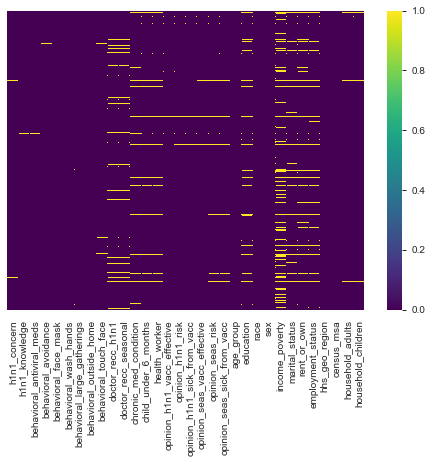

In [19]:
sns.set_style('whitegrid')
sns.heatmap(feature_data_imp.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [20]:
num_cols = feature_data_imp.select_dtypes([np.number]).columns
non_num_cols = feature_data_imp.select_dtypes(exclude = [np.number]).columns
feature_data_imp[num_cols] = feature_data_imp[num_cols].fillna(feature_data_imp[num_cols].mean())
feature_data_imp[non_num_cols] = feature_data_imp[non_num_cols].fillna(feature_data_imp[non_num_cols].mode().iloc[0])

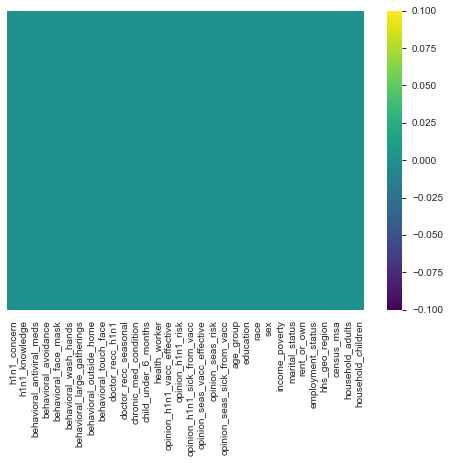

In [21]:
sns.set_style('whitegrid')
sns.heatmap(feature_data_imp.isnull(),yticklabels=False,cbar=True,cmap='viridis')

### Encoding Categorical Variables

In [22]:
labelencoder = LabelEncoder()

In [23]:
feature_data_enc = feature_data_imp

In [24]:
objList = feature_data_enc.select_dtypes(include = "object").columns
objList

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object')

In [25]:
Feature_Code_Value = pd.DataFrame(columns=['Feature_Type', 'Feature_Value', 'Feature_Value_Enc', 'Feature_Value_Cnt'])

In [26]:
for feat in objList:
    feat_col_name = feat+'_enc'
    feature_data_enc[feat_col_name] = labelencoder.fit_transform(feature_data_enc[feat].astype(str))
    feat_temp_val = feature_data_enc.groupby([feat, feat_col_name]).size().reset_index().rename(columns={0:'Feature_Value_Cnt'})
    feat_temp_val['Feature_Type'] = feat
    #feat_temp_val[['Feature_Type', feat, feat_col_name, 'Feature_Value_Cnt']]
    Feature_Code_Value = Feature_Code_Value[['Feature_Type', 'Feature_Value', 'Feature_Value_Enc', 'Feature_Value_Cnt']].append(feat_temp_val[['Feature_Type', feat, feat_col_name, 'Feature_Value_Cnt']])
    Feature_Code_Value.Feature_Value.fillna(Feature_Code_Value[feat], inplace=True)
    Feature_Code_Value.Feature_Value_Enc.fillna(Feature_Code_Value[feat_col_name], inplace=True)
    Feature_Code_Value.drop(columns=[feat, feat_col_name], axis=1, inplace=True)
    del feat_temp_val
    feature_data_enc.drop(columns=[feat], axis=1, inplace=True)
    
Feature_Code_Value.reset_index(drop=True, inplace=True)
Feature_Code_Value['Feature_Value_Enc'] = Feature_Code_Value['Feature_Value_Enc'].astype(int)

In [27]:
Feature_Code_Value

Feature_Type              Feature_Value  Feature_Value_Enc  \
0           age_group              18 - 34 Years                  0   
1           age_group              35 - 44 Years                  1   
2           age_group              45 - 54 Years                  2   
3           age_group              55 - 64 Years                  3   
4           age_group                  65+ Years                  4   
5           education                   12 Years                  0   
6           education                 < 12 Years                  1   
7           education           College Graduate                  2   
8           education               Some College                  3   
9                race                      Black                  0   
10               race                   Hispanic                  1   
11               race          Other or Multiple                  2   
12               race                      White                  3   
13                sex                     Female                  0   
14                sex                       Male                  1   
15     income_poverty  <= $75,000, Above Poverty                  0   
16     income_poverty                  > $75,000                  1   
17     income_poverty              Below Poverty                  2   
18     marital_status                    Married                  0   
19     marital_status                Not Married                  1   
20        rent_or_own                        Own                  0   
21        rent_or_own                       Rent                  1   
22  employment_status                   Employed                  0   
23  employment_status         Not in Labor Force                  1   
24  employment_status                 Unemployed                  2   
25     hhs_geo_region                   atmpeygn                  0   
26     hhs_geo_region                   bhuqouqj                  1   
27     hhs_geo_region                   dqpwygqj                  2   
28     hhs_geo_region                   fpwskwrf                  3   
29     hhs_geo_region                   kbazzjca                  4   
30     hhs_geo_region                   lrircsnp                  5   
31     hhs_geo_region                   lzgpxyit                  6   
32     hhs_geo_region                   mlyzmhmf                  7   
33     hhs_geo_region                   oxchjgsf                  8   
34     hhs_geo_region                   qufhixun                  9   
35         census_msa   MSA, Not Principle  City                  0   
36         census_msa        MSA, Principle City                  1   
37         census_msa                    Non-MSA                  2   

   Feature_Value_Cnt  
0               5215  
1               3848  
2               5238  
3               5563  
4               6843  
5               5797  
6               2363  
7              11504  
8               7043  
9               2118  
10              1755  
11              1612  
12             21222  
13             15858  
14             10849  
15             17200  
16              6810  
17              2697  
18             14963  
19             11744  
20             20778  
21              5929  
22             15023  
23             10231  
24              1453  
25              2033  
26              2846  
27              1126  
28              3265  
29              2858  
30              2078  
31              4297  
32              2243  
33              2859  
34              3102  
35             11645  
36              7864  
37              7198

In [28]:
feature_data_enc

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0               1.0             0.0                        0.0   
1               3.0             2.0                        0.0   
2               1.0             1.0                        0.0   
3               1.0             1.0                        0.0   
4               2.0             1.0                        0.0   
...             ...             ...                        ...   
26702           2.0             0.0                        0.0   
26703           1.0             2.0                        0.0   
26704           2.0             2.0                        0.0   
26705           1.0             1.0                        0.0   
26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  ...  age_group_enc  \
0                   1.000000          0.000000  ...              3   
1                   1.000000          0.000000  ...              1   
2                   0.000000          0.220312  ...              0   
3                   0.000000          0.000000  ...              4   
4                   1.000000          0.000000  ...              2   
...                      ...               ...  ...            ...   
26702               0.000000          0.000000  ...              4   
26703               0.000000          1.000000  ...              0   
26704               1.000000          0.000000  ...              3   
26705               0.677264          0.000000  ...              0   
26706               0.000000          0.000000  ...              4   

       education_enc  race_enc  sex_enc  income_poverty_enc  \
0                  1         3        0                   2   
1                  0         3        1                   2   
2                  2         3        1                   0   
3                  0         3        0                   2   
4                  3         3        0                   0   
...              ...       ...      ...                 ...   
26702              3         3        0                   0   
26703              2         3        1                   0   
26704              3         3        0                   0   
26705              3         1        0                   0   
26706     

### Correlation Matrix

In [30]:
corr = feature_data_enc.corr()

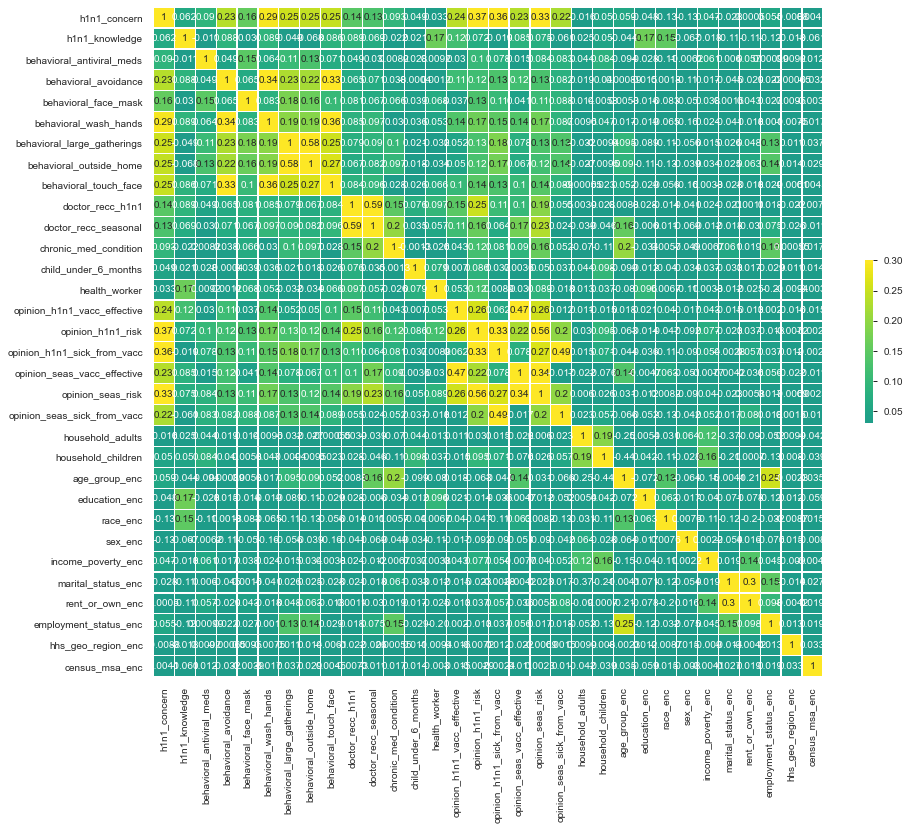

In [31]:
# Checking for Correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='viridis', vmax=.3 ,vmin=.03 ,center=0,square=True, linewidths=.2, 
            cbar_kws={"shrink": .2}, annot=True)

In [32]:
kot = corr[(corr>=.8) & (corr<1)]
kot.dropna(axis=0, how='all', inplace = True)
kot.dropna(axis=1, how='all', inplace = True)
plt.figure(figsize=(12,8))
#sns.heatmap(kot, annot=True, fmt='.4g', cmap= 'coolwarm', linewidths=3, linecolor='black')

kot
#matrix = np.triu(kot)
#sns.heatmap(kot, annot=True, fmt='.4g', cmap= 'coolwarm', mask = matrix)

Empty DataFrame
Columns: []
Index: []

<Figure size 864x576 with 0 Axes>

##### Define X and Y

Since this is multi-label classification, we will start by defining X and Y.

In [33]:
X = feature_data_enc
Y = label_data.drop(columns=['respondent_id'], axis=1)

In [43]:
Y.head()

h1n1_vaccine  seasonal_vaccine
0             0                 0
1             0                 1
2             0                 0
3             0                 1
4             0                 0

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=rand_state)

### Sample Models

In [37]:
#!pip install scikit-multilearn

In [40]:
from skmultilearn.problem_transform import ClassifierChain

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(X_train, Y_train)

# predict
predictions = classifier.predict(X_test)

# accuracy
print("Accuracy = ",accuracy_score(Y_test,predictions))
print("\n")

Accuracy =  0.6627227796914782




In [41]:
classifier = DecisionTreeClassifier()

# Training logistic regression model on train data
classifier.fit(X_train, Y_train)

# predict
predictions = classifier.predict(X_test)

# accuracy
print("Accuracy = ",accuracy_score(Y_test,predictions))
print("\n")

Accuracy =  0.5379661524636813


